In [132]:
import numpy as np
import h5py
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [125]:
with h5py.File('test_run.mat', 'r') as f:
    f.keys()

    n = np.array(f.get('N'))
    N = int(n[0])
    r = np.array(f.get('rows'))[0]
    rows = int(r[0])
    tmax = np.array(f.get('tmax'))
    tmax = int(tmax[0])
    data = np.array(f.get('RES'))

In [126]:
blue = '#00274C'
maize = '#FFCB05'

In [127]:
ppl_in_wave = np.sum(data, axis = 2)
ppl_in_wave = np.sum(ppl_in_wave, axis=1)

col_ppl = np.sum(data, axis=2)
row_ppl = np.sum(data, axis=1)

first_occupied_row = np.argmax(row_ppl != 0, axis=1)
last_occupied_row = row_ppl.shape[1] - np.argmax(np.fliplr(row_ppl != 0), axis=1) - 1

occupied_rows = last_occupied_row - first_occupied_row + 1

first_occupied_col = np.argmax(col_ppl != 0, axis=1)
last_occupied_col = col_ppl.shape[1] - np.argmax(np.fliplr(col_ppl != 0), axis=1) - 1

occupied_cols = last_occupied_col - first_occupied_col + 1


In [128]:

# velocity of wave

com = np.sum(col_ppl * np.arange(N), axis = 1)/ np.sum(col_ppl,axis = 1)

vel = np.diff(com)[:-10]

avg_vel = np.average(vel)

print(avg_vel)



nan


C:\Users\yayin\AppData\Local\Temp\ipykernel_20032\1723251903.py:3: RuntimeWarning: invalid value encountered in divide
  com = np.sum(col_ppl * np.arange(N), axis = 1)/ np.sum(col_ppl,axis = 1)


In [149]:
def get_seat_lims(first, last, width):
    front_pad = int((width - (last - first+1)) / 2)
    back_pad = width - (last - first) - front_pad

    if first - front_pad < 0:
        return (0, last + back_pad + front_pad + 1)

    return(first - front_pad, last + back_pad + 1)

lims0 = get_seat_lims(first_occupied_col[0], last_occupied_col[0], 10)

print(lims0)

(0, 11)


In [152]:
ind = np.argwhere(data == 1)

print(data.shape)
print(np.flip(data).shape)

ind[457]

print(first_occupied_col[2], last_occupied_col[2])
print(lims15)

(87, 250, 50)
(87, 250, 50)
6 7
(26, 42)


AttributeError: 'numpy.ndarray' object has no attribute 'tick_params'

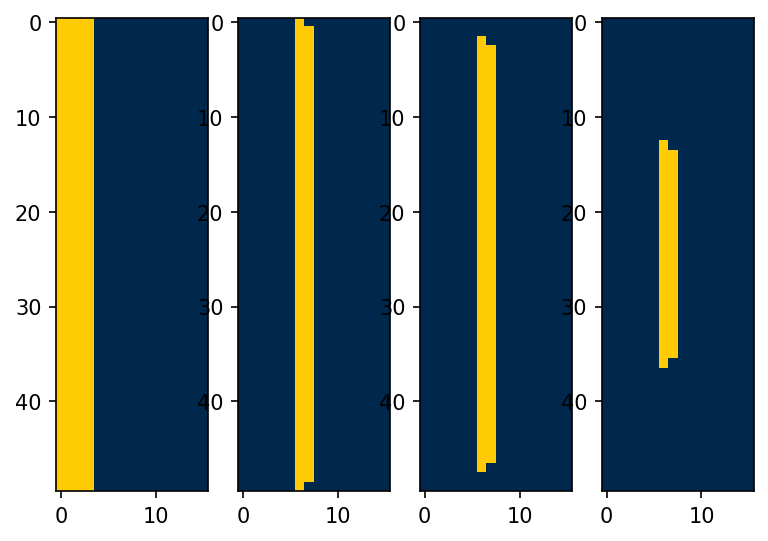

In [154]:
R, C = np.meshgrid(np.arange(rows), np.arange(N))

x1 = np.random.rand(10)
y1 = np.random.rand(10)

x2 = np.random.rand(10)
y2 = np.random.rand(10)

x3 = np.random.rand(10)
y3 = np.random.rand(10)

x4 = np.random.rand(10)
y4 = np.random.rand(10)

# Create the colormap using the two colors
colors = [blue, maize]
cmap = LinearSegmentedColormap.from_list('GoBlue', colors)

fig, axs = plt.subplots(1,4, figsize=(6,5), dpi=150, gridspec_kw={'width_ratios': [1, 1, 1,1]})

lims0 = get_seat_lims(first_occupied_col[0], last_occupied_col[0], 15)
lims2 = get_seat_lims(first_occupied_col[2], last_occupied_col[2], 15)
lims4 = get_seat_lims(first_occupied_col[4], last_occupied_col[4], 15)
lims15 = get_seat_lims(first_occupied_col[15], last_occupied_col[15], 15)


# Plot the data in each subplot
im0 = axs[0].imshow(data[0, lims0[0]:lims0[1],:].T, cmap=cmap)
im1 = axs[1].imshow(data[2, lims2[0]:lims2[1],:].T, cmap=cmap)
im2 = axs[2].imshow(data[4, lims4[0]:lims4[1],:].T, cmap=cmap)
im3 = axs[3].imshow(data[15, lims15[0]:lims15[1],:].T, cmap=cmap)

for ax in axs:
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

# Set titles for each subplot
axs[0].set_title(r'$t=0$', fontsize=16)
axs[0].set_ylabel('Row Number')
axs[0].set_ylim((0,49))

axs[1].set_title(r'$t=2$', fontsize=16)
axs[1].set_ylim((0,49))

axs[2].set_title(r'$t=4$', fontsize=16)
axs[2].set_ylim((0,49))

axs[3].set_title(r'$t=15$', fontsize=16)
axs[3].set_ylim((0,49))

fig.colorbar(im0, ax=axs[3])

# Adjust the spacing between subplots
#plt.subplots_adjust(wspace=0.35, hspace=0.2)

plt.tight_layout()

# Show the plot
plt.show()


